# Data Filteration to create Data Frame

In [2]:
import string
import sys
import docx
import re
import os
import docx 
import nltk
import pandas as pd 
import collections
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
list3=['1.07.08','1.08.22','1.09.19','1.10.17','1.11.21','2.00.19','2.01.17','2.02.16','2.03.14','02.04.16','02.05.30','02.06.13','02.07.19','02.08.08','02.09.06','02.10.06','02.10.08','03.00.12','03.01.10','03.02.08','03.03.06','03.04.09']
list7=list3.copy()
list10=['1.07.08','1.08.22','1.11.21','2.00.19','2.01.17','2.02.16','2.03.14','02.05.30','02.06.13','02.07.19','02.09.06','02.10.06','03.01.10','03.03.06','03.04.09']
list11=list10.copy()
templist=[]
templist1=[]
#print(list5)
#print(list5)   


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pujit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Creation of Lists to dataframe

In [16]:
list1=[]
list4=[]
list5=[]
doc= docx.Document('C:\\Users\\pujit\\Downloads\\ChildTong_ParentSpeech.docx')
for para in doc.paragraphs:
    l = nltk.word_tokenize(para.text)
    ll = [x for x in l if not re.fullmatch('[' + string.punctuation + ']+', x)]
    list1.append(ll)
for i in list1:
    for j in i:
        if(j in list3):
            templist1.append(j)
            list3.remove(j)
        else:
            templist.append(', '.join(templist1))
            templist1=[]
            templist.append(j)
    list4.append(' '.join(templist).split())
    templist=[]
list5 = [x for x in list4 if x != []]
for i in list5:
        if(i[0] in list7):
            val=i[0]
            list7.remove(i[0])
        else:
            i.insert(0,val)
#print(list5)
for i in list5:
    templist=i[2:]
    del i[2:len(i)]
    i.append(templist)
    templist=[]


Dataframe containing Records of parents

In [3]:
df = pd.DataFrame(list5, columns = ['Age', 'Relation', 'Utterances']) 
print(df)

          Age Relation                                        Utterances
0     1.07.08     *MOT                                           [打, 爸爸]
1     1.07.08     *FAT                                      [哎, 不, 能, 打]
2     1.07.08     *FAT                                         [不, 能, 打]
3     1.07.08     *FAT                                     [不, 能, 打, 爸爸]
4     1.07.08     *FAT                                     [打, 爸爸, 疼, 啊]
5     1.07.08     *FAT                           [哎, 打, 自己, 的, 头, 干吗, 啊]
6     1.07.08     *FAT                                            [不, 打]
7     1.07.08     *MOT                                  [打, 喷嚏, 了, 你, 都]
8     1.07.08     *FAT                                 [哎呦, 打, 开, 啦, 同同]
9     1.07.08     *FAT                                         [打, 开, 啦]
10    1.07.08     *FAT                                      [打, 游戏, 好不好]
11    1.07.08     *MOT                                         [打, 球, 啊]
12    1.07.08     *MOT                             

Counter of Prefixes and Post Fixes

In [4]:
prelist=[]
postlist=[]
for ind in df.index: 
     for i in range(0,len(df['Utterances'][ind])-1):
            if(df['Utterances'][ind][i]=="打"):
                if(i-1<0):
                    postlist.append(df['Utterances'][ind][i+1])
                elif(i>=len(df['Utterances'][ind])-1):
                    prelist.append(df['Utterances'][ind][i-1])
                else:
                    prelist.append(df['Utterances'][ind][i-1])
                    postlist.append(df['Utterances'][ind][i+1])
counter1=collections.Counter(prelist)
print(counter1)
counter2=collections.Counter(postlist)
print(counter2)

Counter({'你': 20, '能': 10, '要': 10, '妈妈': 8, '怎么': 6, '别': 6, '来': 5, '我': 5, '不': 5, '都': 5, '没': 5, '再': 4, '在': 4, '枪': 4, '哦': 4, '也': 4, '会': 4, '哎呦': 3, '同同': 3, '里': 3, '这里': 3, '为什么': 3, '它们': 2, '它': 2, '又': 2, '是': 2, '轰隆隆': 2, '打': 2, '警车': 2, '嗯': 2, '就': 2, '说': 2, '刚才': 2, '那里': 2, '去': 2, '自己': 2, '哎': 1, '一起': 1, '上面': 1, '那': 1, '蚊子': 1, '前': 1, '空调': 1, '给': 1, '一直': 1, '爸爸': 1, '鸟': 1, '得': 1, '想': 1, '啊': 1, '叫': 1, '一': 1, 'n': 1, '幼儿园': 1, '每': 1, '成': 1, '需要': 1, '球': 1, '这样': 1, '噢': 1, '学': 1, '救护车': 1, '肚子': 1, '游乐场': 1, '开关': 1, '奶奶': 1, '人': 1, '大家': 1, '东西': 1, '玩': 1, '医院': 1, '还': 1, '个': 1, '水枪': 1, '呃': 1, '架': 1, '你们': 1, '次': 1, '镜头': 1, '结': 1, '的': 1, '迷路': 1, '今天': 1, '喜欢': 1})
Counter({'开': 34, '了': 18, '到': 18, '不': 12, '电话': 11, '招呼': 8, '妈妈': 7, '得': 7, '人': 7, '我': 6, '的': 6, '球': 5, '牌': 5, '死': 5, '吧': 5, '你': 5, '雷': 5, '喷嚏': 4, '蜡烛': 4, '同同': 4, '伞': 4, '一': 4, '什么': 4, '水枪': 4, '爸爸': 3, '个': 3, '小': 3, '没': 3, '起': 3, '叉': 3, '啊': 2, '下':

Child Tong File

In [5]:
list2=[]
list5=[]
list4=[]
doc2 = docx.Document('C:\\Users\\pujit\\Downloads\\ChildTong_Speech.docx')
for para in doc2.paragraphs:
    l1 = nltk.word_tokenize(para.text)
    ll1 = [x for x in l1 if not re.fullmatch('[' + string.punctuation + ']+', x)]
    list2.append(ll1)

In [6]:
for i in list2:
    for j in i:
        if(j in list10):
            templist1.append(j)
            list10.remove(j)
        else:
            templist.append(', '.join(templist1))
            templist1=[]
            templist.append(j)
    list4.append(' '.join(templist).split())
    templist=[]
list5 = [x for x in list4 if x != []]
val=""
for i in list5:
        if(i[0] in list11):
            val=i[0]
            list11.remove(i[0])
        else:
            i.insert(0,val)
for i in list5:
    templist=i[2:]
    del i[2:len(i)]
    i.append(templist)
    templist=[]
#print(list5)

In [7]:
df1 = pd.DataFrame(list5, columns = ['Age', 'Child', 'Utterances']) 
print(df1)

          Age Child                                         Utterances
0     1.07.08  *CHI                                          [打, 开, 啦]
1     1.07.08  *CHI                                             [打, 球]
2     1.07.08  *CHI                                             [打, 球]
3     1.08.22  *CHI                                             [打, 牌]
4     1.08.22  *CHI                                             [打, 牌]
5     1.11.21  *CHI                                         [打, 哪里, 啊]
6     1.11.21  *CHI                                      [打, 到, 翅膀, 上]
7     1.11.21  *CHI                                          [妈, 打, 开]
8     1.11.21  *CHI                             [妈妈, 会, 打, 开, 的, 那, 伞]
9     1.11.21  *CHI                                             [打, 开]
10    1.11.21  *CHI                                       [妈, 打, 开, 伞]
11    1.11.21  *CHI                                         [妈妈, 打, 枪]
12    1.11.21  *CHI                                            [打, 妈妈]
13    

Visualization Starts

In [ ]:
prechildlist=[]
postchildlist=[]
for ind in df1.index: 
     for i in range(0,len(df1['Utterances'][ind])-1):
            if(df1['Utterances'][ind][i]=="打"):
                if(i-1<0):
                    postchildlist.append(df1['Utterances'][ind][i+1])
                elif(i>=len(df1['Utterances'][ind])-1):
                    prechildlist.append(df1['Utterances'][ind][i-1])
                else:
                    prechildlist.append(df1['Utterances'][ind][i-1])
                    postchildlist.append(df1['Utterances'][ind][i+1])
childcounter1=collections.Counter(prechildlist)
print(childcounter1)
childcounter2=collections.Counter(postchildlist)
print(childcounter2)


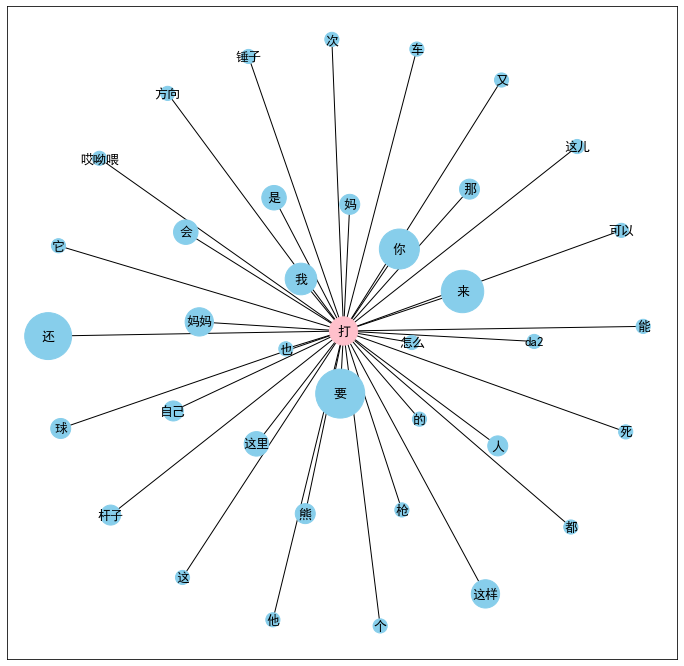

In [20]:
import networkx as nx
import matplotlib as plt
import matplotlib.pyplot as plty
from matplotlib import font_manager
plt.font_manager._rebuild()
plt.rcParams['font.sans-serif']=['SimHei']
G = nx.Graph()
G.add_node('打')
node_sizes = []
for i in childcounter1:
    G.add_edge('打', i, weight=childcounter1[i], capacity=childcounter1[i], length=childcounter1[i])
    node_sizes.append(200*childcounter1[i])
color_map = []
for node in G:
    if node == '打':
        color_map.append('pink')
    else: color_map.append('skyblue') 
pos=nx.spring_layout(G, dim=2, k=0.4, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)        
plty.figure(3,figsize=(12,12)) 
nx.draw_networkx(G,pos,node_size=node_sizes,node_color = color_map,with_labels = True,font_size= 13)
plty.show()

Child Speech with prefix

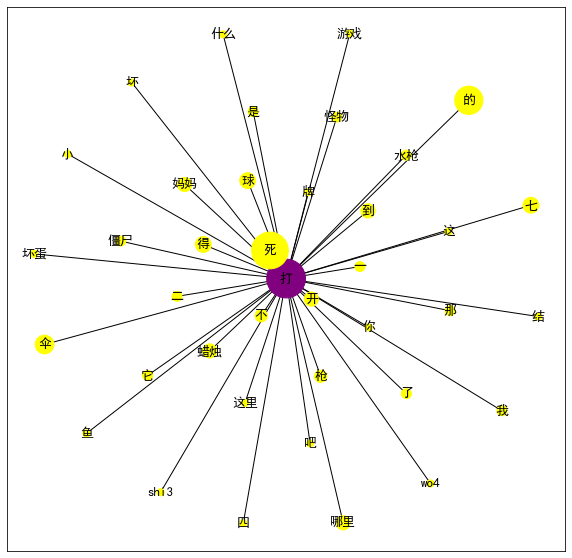

In [10]:
import networkx as nx
H= nx.Graph()
H.add_node('打')
node_sizes=[]
for i in childcounter2:
    H.add_weighted_edges_from([('打', i, childcounter2[i])])
    node_sizes.append(50*childcounter2[i])  
color_map = []
for node in H:
    if node == '打':
        color_map.append('purple')
    else: 
        color_map.append('yellow')
pos=nx.spring_layout(H, dim=2, k=0.4, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plty.figure(3,figsize=(10,10)) 
nx.draw_networkx(H,pos,node_size=node_sizes,node_color = color_map,with_labels = True,font_size= 13)
plty.show()

Child Speech with Suffixes

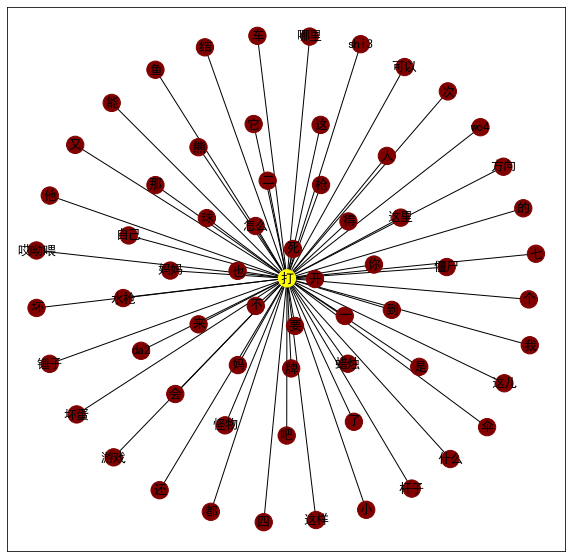

In [11]:
G2=nx.Graph()
G2 = nx.compose(G,H)
color_map=[]
for node in G2:
    if node == '打':
        color_map.append('yellow')
    else: 
        color_map.append('maroon')
pos=nx.spring_layout(G2, dim=2, k=0.4, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plty.figure(3,figsize=(10,10)) 
nx.draw_networkx(G2,pos,node_color = color_map,with_labels = True,font_size= 13)
plty.show()

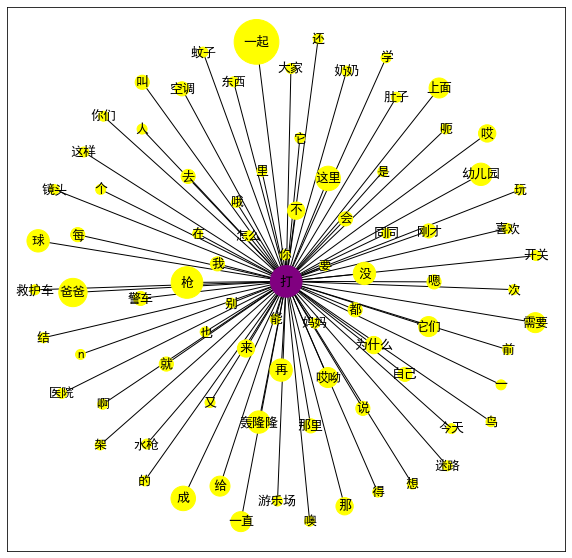

In [12]:
import networkx as nx
G1 = nx.Graph()
node_sizes=[]
color_map=[]
G1.add_node('打')
for i in counter1:
    G1.add_weighted_edges_from([('打', i, counter1[i])])
    node_sizes.append(100*counter1[i])
for node in G1:
    if node == '打':
        color_map.append('purple')
    else: 
        color_map.append('yellow')
pos=nx.spring_layout(G1, dim=2, k=0.4, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plty.figure(3,figsize=(10,10)) 
nx.draw_networkx(G1,pos,node_size=node_sizes,node_color = color_map,with_labels = True,font_size= 13)
plty.show()

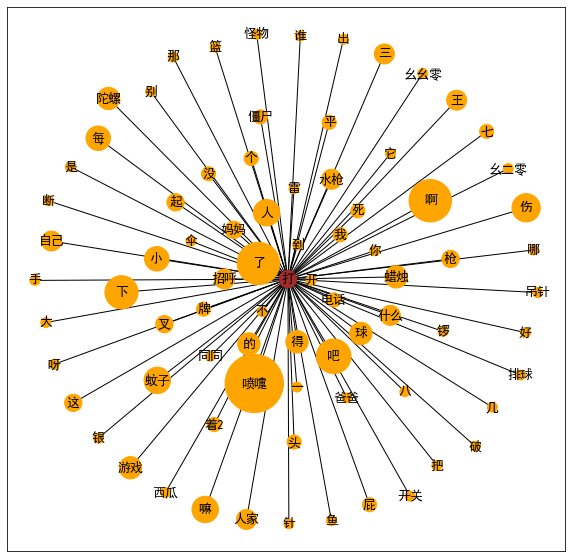

In [13]:
import networkx as nx
G2 = nx.Graph()
node_sizes=[]
color_map=[]
G2.add_node('打')
for i in counter2:
    G2.add_weighted_edges_from([('打', i, counter2[i])])
    node_sizes.append(100*counter2[i])
for node in G2:
    if node == '打':
        color_map.append('brown')
    else: 
        color_map.append('orange')
pos=nx.spring_layout(G2, dim=2, k=0.4, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plty.figure(3,figsize=(10,10)) 
nx.draw_networkx(G2,pos,node_size=node_sizes,node_color = color_map,with_labels = True,font_size= 13)
plty.show()

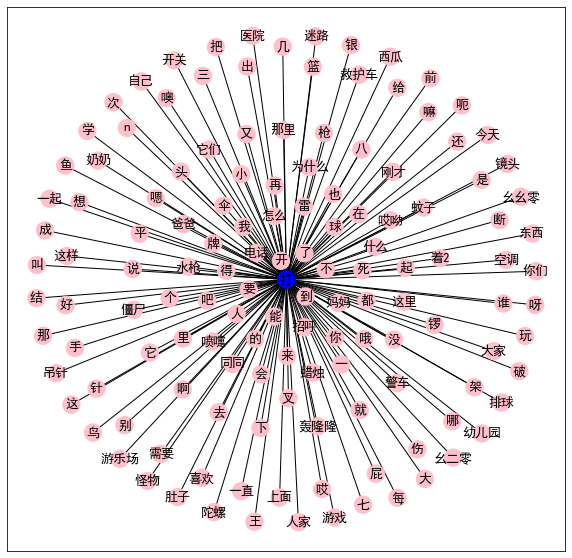

In [14]:
G=nx.Graph()
G = nx.compose(G1,G2)
color_map=[]
for node in G:
    if node == '打':
        color_map.append('blue')
    else: 
        color_map.append('pink')
pos=nx.spring_layout(G, dim=2, k=0.4, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plty.figure(3,figsize=(10,10)) 
nx.draw_networkx(G,pos,node_color = color_map,with_labels = True,font_size= 13)
plty.show()

In [ ]:
list13=[]
for ind in df.index: 
    list13.append(df['Utterances'][ind].count('打'))
plty.figure(4,figsize=(18,18))   
plty.title('Frequency of hearing by age')
plty.xlabel('Age')
plty.ylabel('Num of times heard')
plty.bar(list(df['Age']),list13)

In [ ]:
plty.figure(4,figsize=(18,18))   
plty.title('Frequency of hearing by Relation')
plty.xlabel('Relation')
plty.ylabel('Num of times heard')
plty.bar(list(df['Relation']),list13)

In [ ]:
import matplotlib.pyplot as pltt
list14=[]
for ind in df1.index: 
    list14.append(df1['Utterances'][ind].count('打'))
pltt.figure(4,figsize=(18,18))   
pltt.title('Frequency of Speaking by age')
pltt.xlabel('Age')
pltt.ylabel('Num of times Spoken')
pltt.bar(list(df1['Age']),list14)